In [2]:
from langgraph.graph import StateGraph, END
from langchain.chat_models import init_chat_model

In [3]:
# Defined the state
class State(dict):
    input: str
    output: str

In [4]:
# Create a llm

llm = init_chat_model(
    "gemini-2.5-flash-lite",
    model_provider="google_vertexai"
)

In [5]:
def start_node(state: State) -> State:
    state["output"] = f"you said {state['input']}"
    return state

In [6]:
def llm_node(state: State) -> State:
    response = llm.invoke(state['input'])
    state["output"] = state['output'] + f"\n {response.content}"
    return state

In [7]:
# Build a graph
graph = StateGraph(State)
graph.add_node("start", start_node)
graph.add_node("llm", llm_node)

graph.set_entry_point("start")
graph.add_edge("start", "llm")
graph.add_edge("llm", END)

In [9]:
# compile the graph
app = graph.compile()

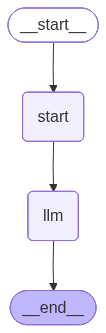

In [12]:
# draw graph
from IPython.display import Image
Image(app.get_graph().draw_mermaid_png())

In [10]:
result = app.invoke({"input": "What is capital of france"})
result

{'input': 'What is capital of france',
 'output': 'you said What is capital of france\n The capital of France is **Paris**.'}